# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [9]:
# Read your api key environment variable
load_dotenv(dotenv_path='KEY.env')

True

In [11]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [14]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 1366


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Bitcoin Could Hit $20K Again But This Time No One Cares',
 'description': 'If you’ve been watching the crypto markets over the past few weeks you’ll have noticed something special: bitcoin, everyone’s favorite decentralized digital currency based on hype, lies, and general malfeasance, is about to hit $20,000—if it can break through…',
 'url': 'https://gizmodo.com/bitcoin-could-hit-20k-again-but-this-time-no-one-cares-1845757159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/puaxex5okv9olikadyqf.jpg',
 'publishedAt': '2020-11-25T23:00:00Z',
 'content': 'If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]'}

In [15]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 455


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Bitcoin rises to three-year peak, all-time high in sight - Reuters UK',
 'description': 'Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just under $20,000 (15,060.24 pounds).',
 'url': 'https://uk.reuters.com/article/uk-crypto-currencies-idUKKBN2801WH',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201120&t=2&i=1541908846&r=LYNXMPEGAJ0ZP&w=800',
 'publishedAt': '2020-11-20T15:01:00Z',
 'content': 'By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]'}

In [16]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
bitcoin_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[bitcoin_cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [17]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
ethereum_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[ethereum_cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.000,1.000,0.000,The New York Times is (probably) about to publ...
3,0.5106,0.000,0.912,0.088,Each comment or response costs a tiny ETH fee ...
4,0.2263,0.047,0.878,0.075,"LONDON (Reuters) - Bitcoin passed $17,000 on T..."


In [18]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,95.000000,95.000000,95.000000,95.000000
mean,0.211005,0.027158,0.897421,0.075400
std,0.376429,0.044980,0.076549,0.071346
min,-0.802000,0.000000,0.698000,0.000000
25%,0.000000,0.000000,0.840500,0.000000
50%,0.202300,0.000000,0.912000,0.070000
75%,0.541800,0.056500,0.945500,0.119000
max,0.893400,0.199000,1.000000,0.302000


In [19]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.241162,0.017124,0.905814,0.077062
std,0.358770,0.038719,0.088851,0.079748
min,-0.710200,0.000000,0.646000,0.000000
25%,0.000000,0.000000,0.836000,0.000000
50%,0.202300,0.000000,0.925000,0.057000
75%,0.557400,0.000000,1.000000,0.139000
max,0.880500,0.182000,1.000000,0.286000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum** at 0.77

Q: Which coin had the highest compound score?

A: **Bitcoin** at 0.89

Q. Which coin had the highest positive score?

A: **Bitcoin** at 0.30

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import json
import re

In [23]:
# Expand the default stopwords list if necessary
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the punctuation
    token = [word.lower() for word in lem if word.lower() not in sw]
    return token

In [62]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
3,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...,"[keep, eye, today, may, see, first, highaltitu..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [64]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staffa, representation, virtual, cur..."
2,0.0000,0.000,1.000,0.000,The New York Times is (probably) about to publ...,"[new, york, times, probably, publish, story, c..."
3,0.5106,0.000,0.912,0.088,Each comment or response costs a tiny ETH fee ...,"[comment, response, cost, tiny, eth, fee, ethe..."
4,0.2263,0.047,0.878,0.075,"LONDON (Reuters) - Bitcoin passed $17,000 on T...","[london, reuters, bitcoin, passed, tuesday, to..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams

In [76]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = tokenizer(''.join(str(bitcoin_df['text'].tolist())))
bitcoin_counts = Counter(ngrams(bitcoin_words, n=2))
print(dict(bitcoin_counts))

{('youve', 'watching'): 1, ('watching', 'crypto'): 1, ('crypto', 'market'): 2, ('market', 'past'): 1, ('past', 'week'): 2, ('week', 'youll'): 1, ('youll', 'noticed'): 1, ('noticed', 'something'): 1, ('something', 'special'): 1, ('special', 'bitcoin'): 1, ('bitcoin', 'everyones'): 1, ('everyones', 'favorite'): 1, ('favorite', 'decentralized'): 1, ('decentralized', 'digital'): 1, ('digital', 'currency'): 4, ('currency', 'based'): 1, ('based', 'hype'): 1, ('hype', 'lie'): 1, ('lie', 'general'): 1, ('general', 'mal'): 1, ('mal', 'char'): 1, ('char', 'reuters'): 2, ('reuters', 'staffrna'): 2, ('staffrna', 'representation'): 2, ('representation', 'virtual'): 2, ('virtual', 'currency'): 3, ('currency', 'bitcoin'): 3, ('bitcoin', 'seen'): 3, ('seen', 'illustration'): 2, ('illustration', 'taken'): 3, ('taken', 'november'): 2, ('november', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationrnnew'): 2, ('ruvicillustrationrnnew', 'york'): 2, ('york', 'reuters'): 6, ('reuters', 'bitcoin'): 5, ('b

In [77]:
# Generate the Ethereum N-grams where N=2
ethereum_words = tokenizer(''.join(str(ethereum_df['text'].tolist())))
ethereum_counts = Counter(ngrams(ethereum_words, n=2))
print(dict(ethereum_counts))

{('reuters', 'staffrna'): 2, ('staffrna', 'representation'): 2, ('representation', 'virtual'): 2, ('virtual', 'currency'): 3, ('currency', 'bitcoin'): 3, ('bitcoin', 'seen'): 3, ('seen', 'illustration'): 2, ('illustration', 'taken'): 3, ('taken', 'november'): 2, ('november', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationrnnew'): 2, ('ruvicillustrationrnnew', 'york'): 2, ('york', 'reuters'): 4, ('reuters', 'bitcoin'): 5, ('bitcoin', 'btcbtsp'): 2, ('btcbtsp', 'rose'): 2, ('rose', 'n'): 2, ('n', 'char'): 3, ('char', 'reuters'): 1, ('char', 'new'): 4, ('new', 'york'): 2, ('york', 'times'): 1, ('times', 'probably'): 1, ('probably', 'publish'): 1, ('publish', 'story'): 1, ('story', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 3, ('exchange', 'coinbase'): 2, ('coinbase', 'reading'): 1, ('reading', 'news'): 1, ('news', 'outlet'): 1, ('outlet', 'website'): 1, ('website', 'coinbase'): 1, ('coinbase', 'ha'): 2, ('ha', 'taken'): 1, ('taken', 'highly'): 1, ('highly', 'un'): 1, ('un

In [79]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [80]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_words, N=10)

[('char', 95),
 ('bitcoin', 84),
 ('price', 30),
 ('ha', 29),
 ('btc', 26),
 ('reuters', 16),
 ('market', 15),
 ('new', 14),
 ('currency', 13),
 ('investor', 12)]

In [81]:
# Get the top 10 words for Ethereum
token_count(ethereum_words, N=10)

[('char', 97),
 ('ethereum', 52),
 ('bitcoin', 41),
 ('eth', 40),
 ('ha', 25),
 ('price', 19),
 ('ether', 17),
 ('btc', 16),
 ('ethereums', 13),
 ('blockchain', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

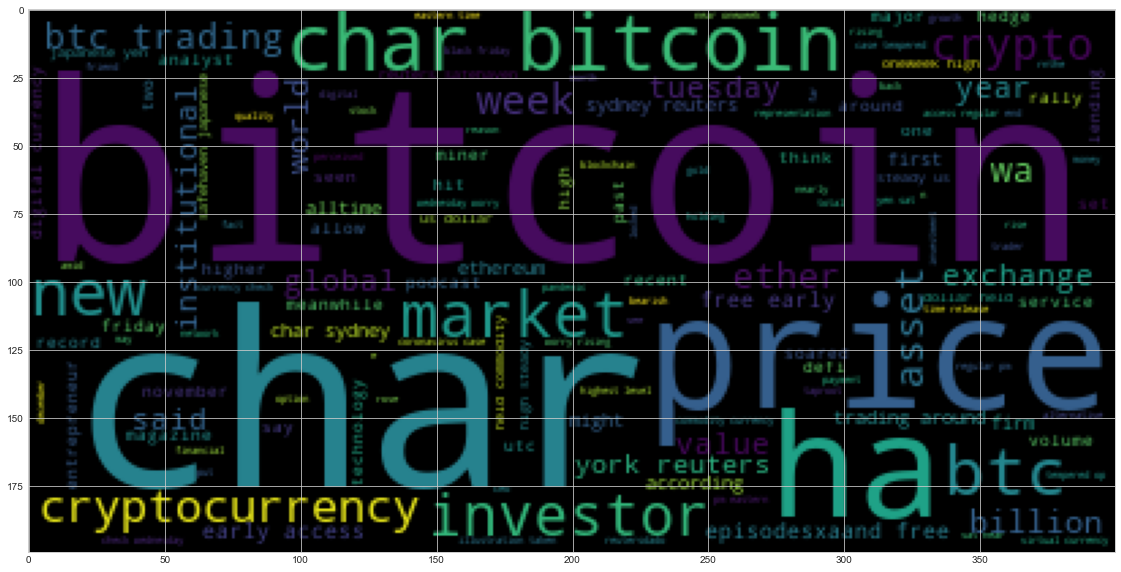

In [84]:
# Generate the Bitcoin word cloud
bitcoin_string = " ".join(bitcoin_words)
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

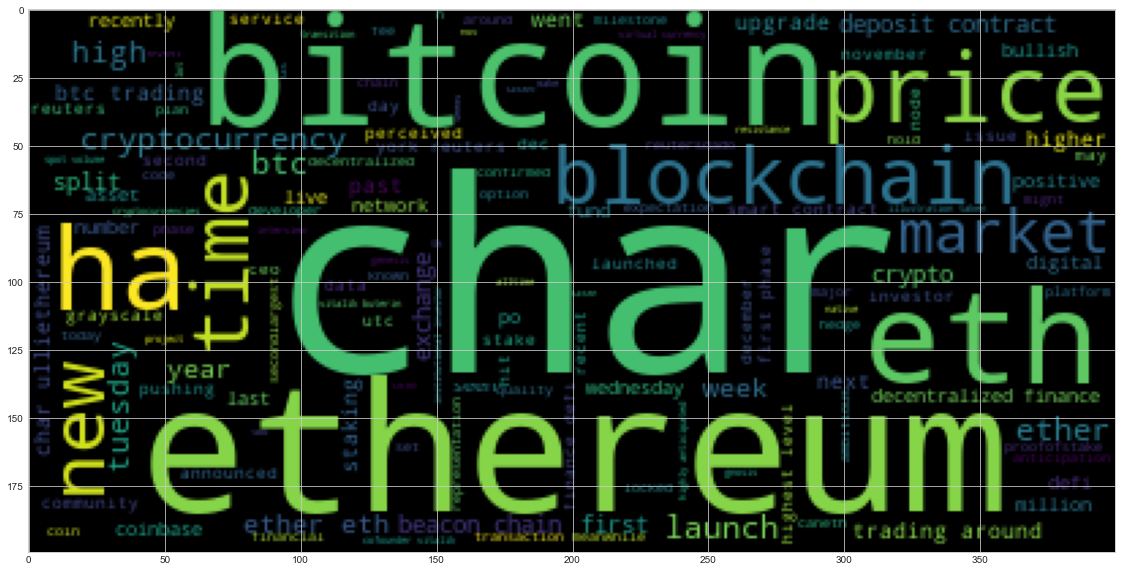

In [85]:
# Generate the Ethereum word cloud
ethereum_string = " ".join(ethereum_words)
ethereum_wc = WordCloud().generate(ethereum_string)
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [86]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [87]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [92]:
# Concatenate all of the bitcoin text together
bitcoin_concat = str(bitcoin_df['text'].tolist())
bitcoin_concat

'[\'If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]\', \'By Reuters Staff\\r\\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\\r\\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]\', \'By Reuters Staff\\r\\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\\r\\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]\', \'Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key to fast travel around the Earth and multiplanetary living has only … [+3833 chars]\', \'In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first

In [97]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_concat)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin spaCy Visualization"

In [98]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [103]:
# List all Entities
for ent in bitcoin_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
YORK PERSON
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
YORK PERSON
Reuters ORG
today DATE
first ORDINAL
Elon Musk ORG
Earth LOC
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Chavez-Dreyfuss\r\nLONDON PERSON
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
NEW YORK GPE
Reuters ORG
Grayscale ORG
Wednesday DATE
a record $10.4 billion MONEY
nearly three years DATE
Bitcoin GPE
over $15k MONEY
BTC ORG
New Bitcoin GPE
Rick PERSON
Mike Novogratz PERSON
half CARDINAL
Bitcoin GPE
Saturday DATE
Twitter user.\r\nHalf a Bitcoin WORK_OF_ART
Iran GPE
B

---

## Ethereum NER

In [105]:
# Concatenate all of the bitcoin text together
ethereum_concat = str(ethereum_df['text'].tolist())
ethereum_concat

'[\'By Reuters Staff\\r\\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\\r\\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]\', \'By Reuters Staff\\r\\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\\r\\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]\', "The New York Times is (probably) about to publish a story about cryptocurrency exchange Coinbase. But we\'re not reading about it on the news outlet\'s website, because Coinbase has taken the highly un… [+3993 chars]", \'Each comment or response costs a tiny ETH fee of 0.00011 (about 5¢ in Ethereum cryptocurrency), payable from your Metamask.io wallet (the wallet is free, and takes just a moment to add to your browse… [+558 chars]\', \'LONDON (Reuters) - Bitcoin passed $17,000 on Tuesday to touch its highest level this year, with inves

In [106]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_concat)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum spaCy Visualization"

In [107]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [108]:
# List all Entities
for ent in ethereum_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
YORK PERSON
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
YORK PERSON
Reuters ORG
The New York Times ORG
Coinbase ORG
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Chavez-Dreyfuss\r\nLONDON PERSON
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
Wednesday DATE
Ethereum 2.0 ORG
ul><li PERSON
Bitcoin GPE
BTC ORG
around $15,694 MONEY
21:00 TIME
4 p.m. ET TIME
2.6% PERCENT
the previous 24 DATE
Bi PERSON
first ORDINAL
Ethereum 2.0 ORG
More than 500,000 CARDINAL
Ethereum 2.0’s ORG
multi-year DATE
JPMorgan ORG
last week DATE
Ethereums 2.0 PRODUCT
50k DATE
ETH ORG
10% PERCENT
first ORDINAL
first ORDINAL
activate.\r\nThe Ethereum 2.0 ORG
385,440 CARDINAL
32